# Домашнее задание 3

## Требования ко всем графикам:
1. все зависимости (данные) должны быть оформлены по-разному (либо разные цвета, либо разные маркеры и пр.)
2. должны присутствовать подписи:
    1. к фигуре
    2. к рисунку (axes)
    3. к каждой оси (xlabel )
    4. (*legend*) к данным

## Задание 1 $\textcolor{yellow}{[6\;баллов]}$

Создайте квадрат $S$ со стороной $a=1$  и координатами левой нижней и правой верхней точек $(0,0)$ и $(1,1)$ соответственно. Впишите в квадрат окружность $C$ , созданную:
1. в декартовых координатах $\textcolor{yellow}{[1\;балл]}$
2. в полярных координатах $\textcolor{yellow}{[1\;балл]}$
3. используя соответсвующую функцию в классе [patches](https://matplotlib.org/stable/api/patches_api.html) сделайте эту **окружность** пунктирной (:) (Почитайте, что такое [**kwargs](https://habr.com/ru/company/ruvds/blog/482464/))$\textcolor{yellow}{[1 балл]}$
4. представив окружность как большую точку с маркером круг (он стоит по умолчанию) и установив соответствующий размер маркера. (Учтите, что функия plot $\textcolor{yellow}{[0.5\;баллов]}$ не отобразит одну точку, если явно не прописать маркер, в отличие от функции scatter $\textcolor{yellow}{[0.5\;баллов]}$) 
5. [Залейте](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) розовым цветом круг $D$, а $S \setminus D$ - лаймовым $\textcolor{yellow}{[2\;балла]}$

Соотношение сторон должно быть одинаковым (1:1)


![](task_1.png)

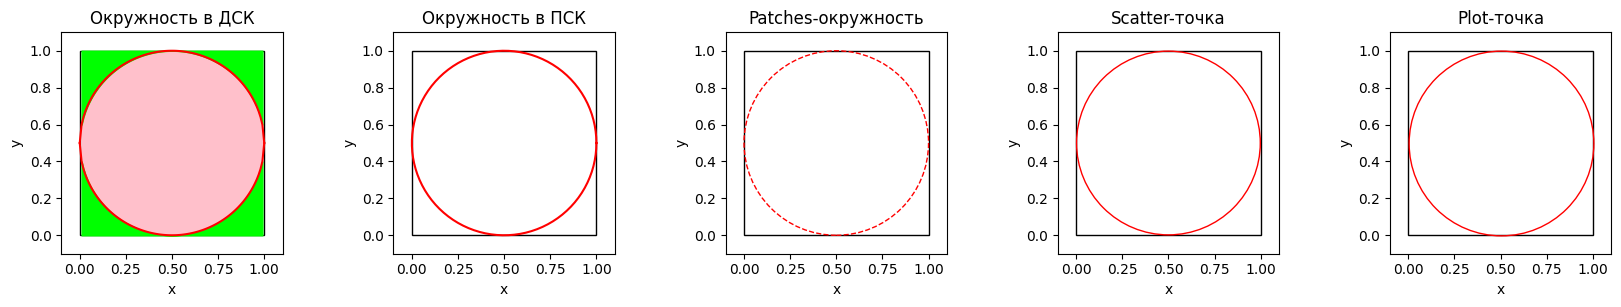

In [163]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

# создание subplot'ов
fig, axs = plt.subplots(1, 5, figsize=(20, 10))
fig.subplots_adjust(wspace=0.5)

# Создание осей координат и квадратов
for ax in axs:
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_aspect('equal')
    square = plt.Rectangle((0, 0), 1, 1, fill=False)
    ax.add_patch(square)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# subplot 1: Создание окружности в ДСК
x = np.linspace(0, 1, 100)
y1, y2 = np.sqrt(0.5**2 - (x-0.5)**2) + 0.5, -np.sqrt(0.5**2 - (x-0.5)**2) + 0.5
axs[0].plot(x, y1, x, y2, color='red')
axs[0].set_title('Окружность в ДСК')

# Заливаем рисунок цветом
axs[0].fill_between(x, y1, y2, where=(y1 > y2), color='pink')
axs[0].fill_between(x, y1, 1, where=y1 > 0.5, color='lime')
axs[0].fill_between(x, y2, 0, where=y2 < 0.5, color='lime')

# subplot 2: создание окружности в ПСК
ang = np.linspace(0, 2*np.pi, 100)
axs[1].plot(0.5*np.cos(ang)+0.5, 0.5*np.sin(ang)+0.5, color='red')
axs[1].set_title('Окружность в ПСК')

# subplot 3: создание окружности при помощи patches
ellipse = Ellipse(xy=(0.5, 0.5), width=1, height=1, linestyle='dashed', edgecolor='red', facecolor='none')
axs[2].add_patch(ellipse)
axs[2].set_title('Patches-окружность')

# subplot 4: создание окружности при помощи scatter
axs[3].scatter(0.5, 0.5, s=17500, color = 'red', facecolor = 'none')
axs[3].set_title('Scatter-точка')

# subplot 5: создание окружности при помощи plot
axs[4].plot(0.5, 0.5, marker='o', markersize=133, color='red', markerfacecolor='none')
axs[4].set_title('Plot-точка')

plt.show()

## Задание 2 $\textcolor{yellow}{[6\;баллов]}$
Проиллюстрируйте численный метод интегрирования функции $ \sin ^2 (x)$ на отрезке от 0 до $ 2 \pi $ [методом прямоугольников](https://ru.wikipedia.org/wiki/Метод_прямоугольников)

1. Создайте фигуру размера $8 \times 8$ дюймов, на которой проиллюстрирован метод средних прямоугольников. *(см. иллюстрацию)*. Будет полезно знать про [штриховку](https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html), [порядок](https://matplotlib.org/stable/gallery/misc/zorder_demo.html) отрисовки, функцию zip $\textcolor{yellow}{[2\;балла]}$

<details>
<summary>полезное применение zip</summary>
<br>
<pre class="hljs" style="display: block; overflow-x: auto; padding: 0.5em; background: rgb(43, 43, 43); color: rgb(186, 186, 186);">l = [<span class="hljs-number" style="color: rgb(104, 150, 186);">0</span>, <span class="hljs-number" style="color: rgb(104, 150, 186);">1</span>, <span class="hljs-number" style="color: rgb(104, 150, 186);">2</span>, <span class="hljs-number" style="color: rgb(104, 150, 186);">3</span>, <span class="hljs-number" style="color: rgb(104, 150, 186);">4</span>, <span class="hljs-number" style="color: rgb(104, 150, 186);">5</span>]
print(<span class="hljs-string" style="color: rgb(224, 196, 108);">'\tprv'</span>, <span class="hljs-string" style="color: rgb(224, 196, 108);">'\tcrn'</span>,<span class="hljs-string" style="color: rgb(224, 196, 108);">'\tnxt'</span>)
<span class="hljs-keyword" style="color: rgb(203, 120, 50);">for</span> prv, crn, nxt <span class="hljs-keyword" style="color: rgb(203, 120, 50);">in</span> zip(l, l[<span class="hljs-number" style="color: rgb(104, 150, 186);">1</span>:], l[<span class="hljs-number" style="color: rgb(104, 150, 186);">2</span>:]):
    print(<span class="hljs-string" style="color: rgb(224, 196, 108);">'\t'</span>, prv, <span class="hljs-string" style="color: rgb(224, 196, 108);">'\t'</span>, crn, <span class="hljs-string" style="color: rgb(224, 196, 108);">'\t'</span>, nxt)</pre>
</br>
</details>

2. Создайте фигуру, содержащую 4 **subplot**'a (3 наверху, 1 внизу), где на верхних **subplot**'ах  изображены
    1. слева - метод левых прямоугольников
    2. в центре - метод средних прямоугольников
    3. справа - метод правых прямоугольников

$\textcolor{yellow}{[2\;балла]}$

3. Внизу создайте логарифмический график с отношением полученных площадей 3-мя разными методами к действительной (аналитически посчитанной) области в зависимости от количеста разбиений $n$

$\textcolor{yellow}{[2\;балла]}$



![](task_2.png)

# Задание 3 $\textcolor{yellow}{[6\;баллов]}$

"Разбросайте" 100 разноцветных точек по плоскости [таким образом](https://matplotlib.org/stable/gallery/axes_grid1/scatter_hist_locatable_axes.html#sphx-glr-gallery-axes-grid1-scatter-hist-locatable-axes-py), чтобы:
1. По оси $x$ [нормальный](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) разброс был в 2 раза больше, чем по оси $y$ $\textcolor{yellow}{[2\;балла]}$
2. Были построены гистограммы распределения точек по координатам $\textcolor{yellow}{[2\;балла]}$
3. Можно было [управлять](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) соотношением цветов. И соответсвующее соотношение цветов (количество точек каждого цвета) показывалось бы в столбчатой диаграмме $\textcolor{yellow}{[2\;балла]}$ 

![](task_3.jpg)